In [1]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pad
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sns.get_dataset_names()

/home/jan/.venv/ml/lib/python3.8/site-packages/seaborn/utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /home/jan/.venv/ml/lib/python3.8/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
flight_data.shape

(144, 3)

In [5]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

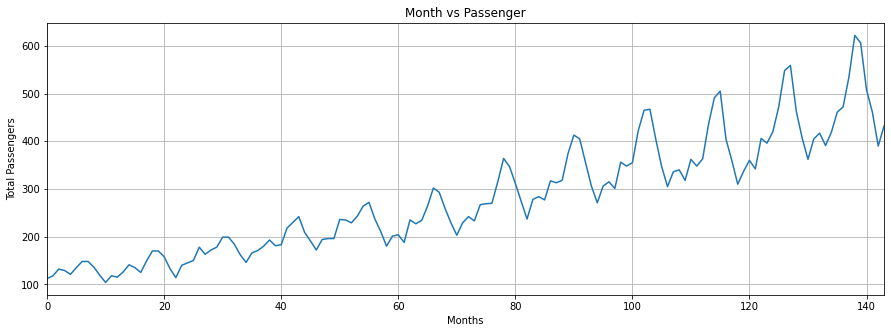

In [6]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])

In [7]:
flight_data.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [8]:
all_data = flight_data['passengers'].values.astype(float)

In [9]:
print(all_data)

[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
 508. 461. 390. 432.]


In [10]:
test_data_size = 12
train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [11]:
print(len(train_data))
print(len(test_data))

132
12


In [12]:
print(test_data)

[417. 391. 419. 461. 472. 535. 622. 606. 508. 461. 390. 432.]


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data.reshape(-1, 1))

In [14]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-0.96483516]
 [-0.93846154]
 [-0.87692308]
 [-0.89010989]
 [-0.92527473]]
[[1.        ]
 [0.57802198]
 [0.33186813]
 [0.13406593]
 [0.32307692]]


In [15]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [16]:
train_window = 12

def create_inout_sequences(input_data, tw=train_window):
    inout_seq = []
    L = len(input_data)
    for i in range(L - tw):
        train_seq = input_data[i:i + tw]
        train_label = input_data[i + tw:i + tw + 1]
        inout_seq.append((train_seq, train_label))
    return inout_seq

In [17]:
train_inout_seq = create_inout_sequences(train_data_normalized)

In [18]:
train_inout_seq[:5]

[(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
          -0.8593, -0.9341, -1.0000, -0.9385]),
  tensor([-0.9516])),
 (tensor([-0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593,
          -0.9341, -1.0000, -0.9385, -0.9516]),
  tensor([-0.9033])),
 (tensor([-0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341,
          -1.0000, -0.9385, -0.9516, -0.9033]),
  tensor([-0.8374])),
 (tensor([-0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000,
          -0.9385, -0.9516, -0.9033, -0.8374]),
  tensor([-0.8637])),
 (tensor([-0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000, -0.9385,
          -0.9516, -0.9033, -0.8374, -0.8637]),
  tensor([-0.9077]))]

In [19]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))
    
    def forward(self, input_seq):
        model_input_seq = input_seq.view(len(input_seq), 1, -1)
        
        lstm_out, self.hidden_cell = self.lstm(model_input_seq, self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        
        return predictions[-1]

In [20]:
device = 'cuda'

model = LSTM().to(device)
loss_function = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [21]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [22]:
epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
                        torch.zeros(1, 1, model.hidden_layer_size).to(device))

        y_pred = model(seq.to(device))

        single_loss = loss_function(y_pred.cpu(), labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.01658487
epoch:  26 loss: 0.01119320
epoch:  51 loss: 0.00028683
epoch:  76 loss: 0.00394931
epoch: 101 loss: 0.00000177
epoch: 126 loss: 0.00022931
epoch: 149 loss: 0.0064642662


In [23]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.12527473270893097, 0.04615384712815285, 0.3274725377559662, 0.2835164964199066, 0.3890109956264496, 0.6175824403762817, 0.9516483545303345, 1.0, 0.5780220031738281, 0.33186814188957214, 0.13406594097614288, 0.32307693362236023]


In [24]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:]).to(device)
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
                        torch.zeros(1, 1, model.hidden_layer_size).to(device))
        test_inputs.append(model(seq).item())

In [25]:
test_inputs[fut_pred:]

[0.3581516742706299,
 0.11232693493366241,
 0.20219559967517853,
 0.2978287637233734,
 0.19357450306415558,
 0.3594295084476471,
 0.5899689197540283,
 0.7769582271575928,
 0.6200307607650757,
 0.33876532316207886,
 0.18041247129440308,
 0.03927125036716461]

In [26]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[412.9795059 ]
 [357.0543777 ]
 [377.49949893]
 [399.25604375]
 [375.53819945]
 [413.27021317]
 [465.71792924]
 [508.25799668]
 [472.55699807]
 [408.56911102]
 [372.54383722]
 [340.43420946]]


In [27]:
x = np.arange(132, 144, 1)
print(x)

[132 133 134 135 136 137 138 139 140 141 142 143]


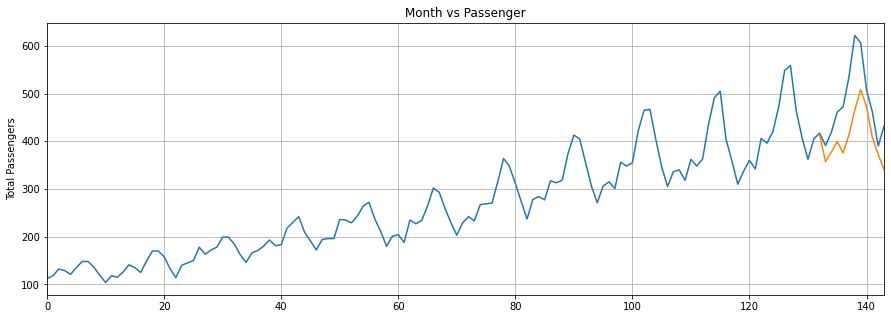

In [28]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(x,actual_predictions)
plt.show()

epoch:   1 loss: 0.20996761
epoch: 101 loss: 0.20025834
epoch: 201 loss: 0.20025633
epoch: 301 loss: 0.02598964
epoch: 401 loss: 0.00779804
epoch: 501 loss: 0.00647570
epoch: 601 loss: 0.00601245
epoch: 701 loss: 0.00559084
epoch: 801 loss: 0.00537189
epoch: 901 loss: 0.00518567
epoch: 1001 loss: 0.00504553
epoch: 1101 loss: 0.00494650
epoch: 1201 loss: 0.00497868
epoch: 1301 loss: 0.00479151
epoch: 1401 loss: 0.00476588
epoch: 1501 loss: 0.00471779
epoch: 1601 loss: 0.00540724
epoch: 1701 loss: 0.00468356
epoch: 1801 loss: 0.00466166
epoch: 1901 loss: 0.00466369
epoch: 2001 loss: 0.00464523
epoch: 2101 loss: 0.00463238
epoch: 2201 loss: 0.00632729
epoch: 2301 loss: 0.00462203
epoch: 2401 loss: 0.00461197
epoch: 2501 loss: 0.00460489
epoch: 2601 loss: 0.00460463
epoch: 2701 loss: 0.00459521
epoch: 2801 loss: 0.00458936
epoch: 2901 loss: 0.00470864
epoch: 3001 loss: 0.00458088
epoch: 3101 loss: 0.00457617
epoch: 3201 loss: 0.00458870
epoch: 3301 loss: 0.00456947
epoch: 3401 loss: 0.0045

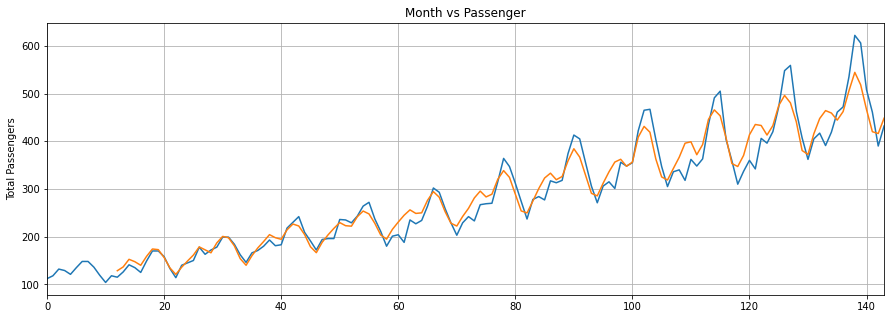

In [73]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1, num_layers=12):
        super().__init__()
        
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=num_layers)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.num_layers = num_layers
        self.reset(0)
    
    def forward(self, input_seq):
#         model_input_seq = input_seq.view(input_seq.shape[1], input_seq.shape[0], -1)    
        lstm_out, self.hidden_cell = self.lstm(input_seq, self.hidden_cell)
        predictions = self.linear(lstm_out.view(input_seq.shape[0], input_seq.shape[1], -1))
        
        return predictions[-1]
    
    def reset(self, batch_size):        
        self.hidden_cell = (torch.zeros(self.num_layers, batch_size, self.hidden_layer_size).to(device),
                        torch.zeros(self.num_layers, batch_size, self.hidden_layer_size).to(device))

class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
    
def build_model(epochs=1000, batch_size=40, lr=0.00001):
    device = 'cuda'

    model = LSTM().to(device)
    loss_function = nn.MSELoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for i in range(epochs):
        for ix in range(0, len(train_inout_seq), batch_size):            
            
            optimizer.zero_grad()
            
            model.reset(batch_size)
            
            batch_seq = []
            batch_labels = []
            for sub_ix in range(batch_size):
                batch_seq.append(train_inout_seq[ix + sub_ix][0])
                batch_labels.append(train_inout_seq[ix + sub_ix][1])
                
            seq = torch.unsqueeze(torch.stack(batch_seq, dim=1), dim=-1)
            labels = torch.unsqueeze(torch.stack(batch_labels, dim=1), dim=-1)
            
            y_pred = model(seq.to(device))
            single_loss = loss_function(torch.unsqueeze(y_pred, dim=0), labels.to(device))
            single_loss.backward()
            optimizer.step()

        if i%100 == 1:
            print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')
    
    return model


def validate_model(model):
    fut_pred = 12

    test_inputs = train_data_normalized[-train_window:].tolist()
    
    fut_pred = 132

    test_inputs = train_data_normalized[:train_window].tolist()
    print(test_inputs)
    
    model.eval()

    for i in range(fut_pred):
        seq = torch.FloatTensor(test_inputs[-train_window:]).view(train_window, 1, 1).to(device)
        with torch.no_grad():
            model.reset(1)
            test_inputs.append(model(seq).cpu()[0])
    
    test_inputs[fut_pred:]
    
    actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
    print(actual_predictions)
    
    x = np.arange(12, 144, 1)
    print(x)
    
    plt.title('Month vs Passenger')
    plt.ylabel('Total Passengers')
    plt.grid(True)
    plt.autoscale(axis='x', tight=True)
    plt.plot(flight_data['passengers'])
    plt.plot(x,actual_predictions)
    plt.show()

model = build_model(10000, 120, 0.0001)
validate_model(model)